<a href="https://colab.research.google.com/github/ent-r/SEC202/blob/master/SEC202_r%C3%A9_impl%C3%A9mentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menaces et contre-mesures pré-définies
menaces_avec_mesures = [
    {"menace": "Usurpation d'identité des opérateurs", "contre-mesure": "Mettre en place des mécanismes d'authentification robustes"},
    {"menace": "Modification non autorisée des données des capteurs", "contre-mesure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
    {"menace": "Négation des actions effectuées par les opérateurs", "contre-mesure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
    {"menace": "Divulgation non autorisée des données de pression d'eau", "contre-mesure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
    {"menace": "Interruption des communications entre les capteurs et les contrôleurs", "contre-mesure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
    {"menace": "Élévation des privilèges non autorisée des utilisateurs finaux", "contre-mesure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
]

# Données des actifs et des risques
actifs_info = {
    "Capteur de pression d'eau": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Réservoir": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Pompe": {"valeur": "Moyen", "menaces": [], "mesures": []},
    "Valve": {"valeur": "Moyen", "menaces": [], "mesures": []},
    "Système de contrôle SCADA": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Logiciel de gestion des ressources en eau": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Réseau de communication": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Opérateur": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Administrateur": {"valeur": "Elevé", "menaces": [], "mesures": []},
    "Utilisateur final": {"valeur": "Moyen", "menaces": [], "mesures": []}
}

# Valeurs de risque
valeurs_risque = {"Elevé": 3, "Moyen": 2, "Faible": 1}
inverse_valeurs_risque = {3: "Elevé", 2: "Moyen", 1: "Faible"}

# Points d'accès et leurs niveaux de confiance
points_acces = [
    {"nom": "Ports USB pour la maintenance des capteurs", "niveau_confiance": "Faible"},
    {"nom": "Interfaces web pour la gestion des réservoirs", "niveau_confiance": "Moyen"},
    {"nom": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "niveau_confiance": "Elevé"},
    {"nom": "Fichiers de configuration des dispositifs SCADA", "niveau_confiance": "Elevé"}
]

# Étape pour ajouter de nouveaux actifs
while True:
    print("\nVoulez-vous ajouter un nouvel actif ?")
    reponse = input("Tapez 'oui' pour ajouter ou 'non' pour continuer : ").strip().lower()
    if reponse == 'non':
        break
    elif reponse == 'oui':
        nom_actif = input("Entrez le nom du nouvel actif : ").strip()
        valeur_risque = input("Entrez la valeur de risque (Elevé, Moyen, Faible) : ").strip().capitalize()
        while valeur_risque not in valeurs_risque:
            valeur_risque = input("Valeur invalide. Entrez Elevé, Moyen, ou Faible : ").strip().capitalize()
        actifs_info[nom_actif] = {"valeur": valeur_risque, "menaces": [], "mesures": []}
        print(f"Actif '{nom_actif}' ajouté avec une valeur de risque '{valeur_risque}'.")
    else:
        print("Veuillez répondre par 'oui' ou 'non'.")

# Ajout des menaces pour chaque actif
for actif, info in actifs_info.items():
    if not info['menaces']:
        print(f"\nVeuillez ajouter des menaces pour l'actif : {actif}")
        while True:
            menace = input(f"Entrez une menace pour '{actif}' (ou tapez 'fin' pour arrêter) : ").strip()
            if menace.lower() == 'fin':
                break
            info["menaces"].append(menace)

            # Recherche des menaces correspondantes et ajout des contre-mesures
            menace_trouvee = None
            for menace_info in menaces_avec_mesures:
                if menace.lower() in menace_info["menace"].lower():
                    menace_trouvee = menace_info
                    break

            if menace_trouvee:
                print(f"\nContre-mesures pour la menace '{menace_trouvee['menace']}' :")
                print(f"- {menace_trouvee['contre-mesure']}")
                info["mesures"].append(menace_trouvee["contre-mesure"])
            else:
                print(f"Aucune mesure spécifique pour la menace '{menace}'.")

# Informations d'installation
installation_info = {}
print("\nVeuillez saisir votre installation en attribuant un nombre à chaque actif.")
for actif, info in actifs_info.items():
    nombre = int(input(f"Entrez le nombre d'unités pour l'actif '{actif}' : "))
    installation_info[actif] = nombre

# Calcul de la moyenne pondérée des risques
total_pondere = 0
total_unites = 0

# Calcul des risques pour les actifs
for actif, info in actifs_info.items():
    valeur_risque = valeurs_risque[info["valeur"]]
    nombre_unites = installation_info[actif]
    total_pondere += valeur_risque * nombre_unites
    total_unites += nombre_unites

# Calcul des risques pour les points d'accès
for point in points_acces:
    valeur_risque = valeurs_risque[point["niveau_confiance"]]
    total_pondere += valeur_risque
    total_unites += 1

if total_unites > 0:
    moyenne_risque_ponderee = total_pondere / total_unites
else:
    moyenne_risque_ponderee = 0

# Conversion en texte
if moyenne_risque_ponderee >= 2.5:
    texte_risque_moyen = "Elevé"
elif moyenne_risque_ponderee >= 1.5:
    texte_risque_moyen = "Moyen"
else:
    texte_risque_moyen = "Faible"

# Résultat final
print("\nRésumé des informations après l'ajout des menaces et des données d'installation :")
for actif, info in actifs_info.items():
    print(f"Actif : {actif}")
    print(f"Valeur de risque : {info['valeur']}")
    if info['menaces']:
        print(f"Menaces associées : {', '.join(info['menaces'])}")
    else:
        print("Aucune menace associée.")
    print(f"Nombre d'unités dans l'installation : {installation_info[actif]}")
    print("-" * 30)

# Affichage du niveau de risque moyen pondéré
print(f"\nLe niveau de risque moyen pondéré dans l'installation est : {texte_risque_moyen}")

# Affichage des mesures à prendre en fonction des menaces
print("\nMesures à prendre en fonction des menaces associées :")
for actif, info in actifs_info.items():
    if info['mesures']:
        print(f"\nActif : {actif}")
        for mesure in info['mesures']:
            print(f"- {mesure}")

# Mesures générales basées sur le niveau de risque moyen
print("\nMesures générales basées sur le niveau de risque moyen :")
if texte_risque_moyen == "Elevé":
    print("- Prioriser les revues de sécurité et mettre en place des mesures strictes immédiatement.")
    print("- Effectuer des tests de pénétration et des évaluations de vulnérabilité réguliers.")
    print("- Assurer une surveillance et des systèmes d'alerte de haut niveau.")
elif texte_risque_moyen == "Moyen":
    print("- Surveiller régulièrement les systèmes de sécurité et effectuer des évaluations périodiques.")
    print("- Appliquer les correctifs et mises à jour dès qu'ils sont disponibles.")
    print("- Ajouter des redondances pour réduire les risques en cas de panne.")
else:
    print("- Examiner régulièrement les journaux et les mesures de sécurité.")
    print("- Appliquer périodiquement les mises à jour et correctifs.")
    print("- Maintenir les meilleures pratiques pour garantir un impact minimal sur la sécurité.")



Voulez-vous ajouter un nouvel actif ?


KeyboardInterrupt: Interrupted by user

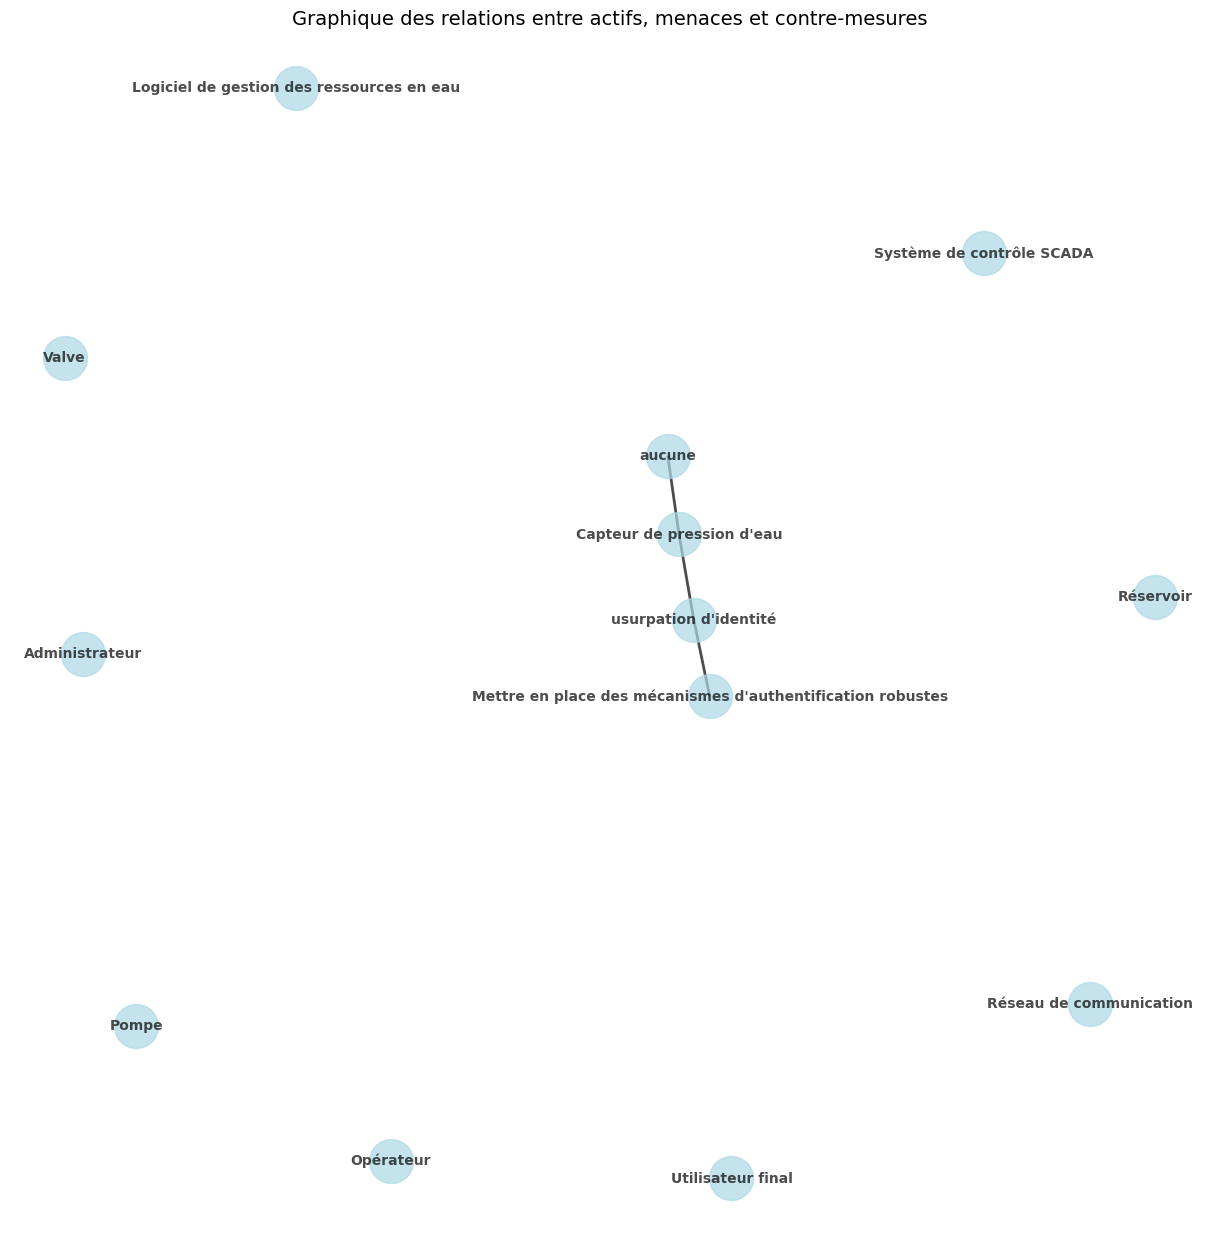

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Création d'un graph
G = nx.Graph()

# Ajout des actifs
for actif in actifs_info:
    G.add_node(actif, type='actif')

# Ajout des menaces et des contre-mesures
for actif, info in actifs_info.items():
    for menace in info['menaces']:
        # Ajouter la menace en tant que nœud
        G.add_node(menace, type='menace')
        # Relier l'actif à la menace
        G.add_edge(actif, menace)

        # Recherche de la contre-mesure associée à la menace
        menace_trouvee = None
        for menace_info in menaces_avec_mesures:
            if menace.lower() in menace_info["menace"].lower():
                menace_trouvee = menace_info
                break

        if menace_trouvee:
            contre_mesure = menace_trouvee['contre-mesure']
            # Ajouter la contre-mesure en tant que nœud
            G.add_node(contre_mesure, type='contre-mesure')
            # Relier la menace à la contre-mesure
            G.add_edge(menace, contre_mesure)

# Définir des positions pour les nœuds (utilisation d'un layout pour éviter les superpositions)
pos = nx.spring_layout(G, seed=42)

# Tracer le graph avec des ajustements pour les nœuds et les arêtes
plt.figure(figsize=(12, 12))
nx.draw(G, pos,
        with_labels=True,
        node_size=1000,  # Réduction de la taille des nœuds (bulles)
        node_color='lightblue',
        font_size=10,
        font_weight='bold',
        edge_color='black',  # Trait noir pour les arêtes
        width=2,  # Augmentation de l'épaisseur des arêtes
        alpha=0.7)  # Légère transparence pour les nœuds

# Ajouter des titres
plt.title('Graphique des relations entre actifs, menaces et contre-mesures', fontsize=14)
plt.axis('off')  # Masquer les axes pour une meilleure présentation

# Afficher le graphique
plt.show()


In [ ]:
def save_graph(G, filename="graph.png"):
    # Définir des positions pour les nœuds (utilisation d'un layout pour éviter les superpositions)
    pos = nx.spring_layout(G, seed=42)

    # Créer une figure
    plt.figure(figsize=(12, 12))

    # Tracer le graph
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

    # Ajouter des titres
    plt.title('Graphique des relations entre actifs, menaces et contre-mesures', fontsize=14)
    plt.axis('off')  # Masquer les axes pour une meilleure présentation

    # Sauvegarder le graphique dans un fichier
    plt.savefig(filename, format='png', bbox_inches='tight')  # Vous pouvez aussi choisir d'autres formats comme .pdf ou .svg

    # Fermer la figure pour libérer la mémoire
    plt.close()
    print(f"Le graphique a été sauvegardé sous '{filename}'.")

# Exemple d'utilisation de la fonction pour sauvegarder le graph
save_graph(G, "graphique_securite.png")


Le graphique a été sauvegardé sous 'graphique_securite.png'.
